# Exploratory Data Analysis of Sales.csv

## 1) Loading the libraries and the dataset

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import grafici
from dython.nominal import associations
import numpy as np
import plotly.express as px

In [90]:
# read the data
sales = pd.read_csv('Cleaned_Data/sales.csv')

# dataset to merge
cars = pd.read_csv('Cleaned_Data/cars.csv')
users = pd.read_csv('Cleaned_Data/users.csv')

## 2) Preparing the data

In [91]:
# merge the cars
sales = pd.merge(sales, cars, on='car_id', how='left')

# merge the users
sales = pd.merge(sales, users, on='customer_id', how='left')

In [92]:
# check duplicates
print('Duplicates:', sales.duplicated().sum())

Duplicates: 0


In [93]:
# reset the index
sales.reset_index(drop=True, inplace=True)

In [94]:
# convert the date to datetime
sales['purchase_date'] = pd.to_datetime(sales['purchase_date'])
sales['release_date'] = pd.to_datetime(sales['release_date'])

In [95]:
# nans
sales.isnull().sum()

transaction_id         0
customer_id            0
car_id                 0
platform               0
purchase_date          0
purchase_price         0
user_review        65070
car_model              0
fuel_type              0
release_date           0
price                  0
user_first_name       21
user_last_name        11
gender                 0
email                 14
dtype: int64

In [96]:
# shape
sales.shape

(74780, 15)

### 2.1) Associations

In [97]:
# copy the dataset
sales_dython = sales.copy()

In [98]:
# print all the column that have id in the name
id_columns = [col for col in sales_dython.columns if '_id' in col]
print("We are dropping the following columns:", id_columns)

# drop the id columns
sales_dython.drop(columns=id_columns, inplace=True)

We are dropping the following columns: ['transaction_id', 'customer_id', 'car_id']


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\dython\nominal.py:632: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



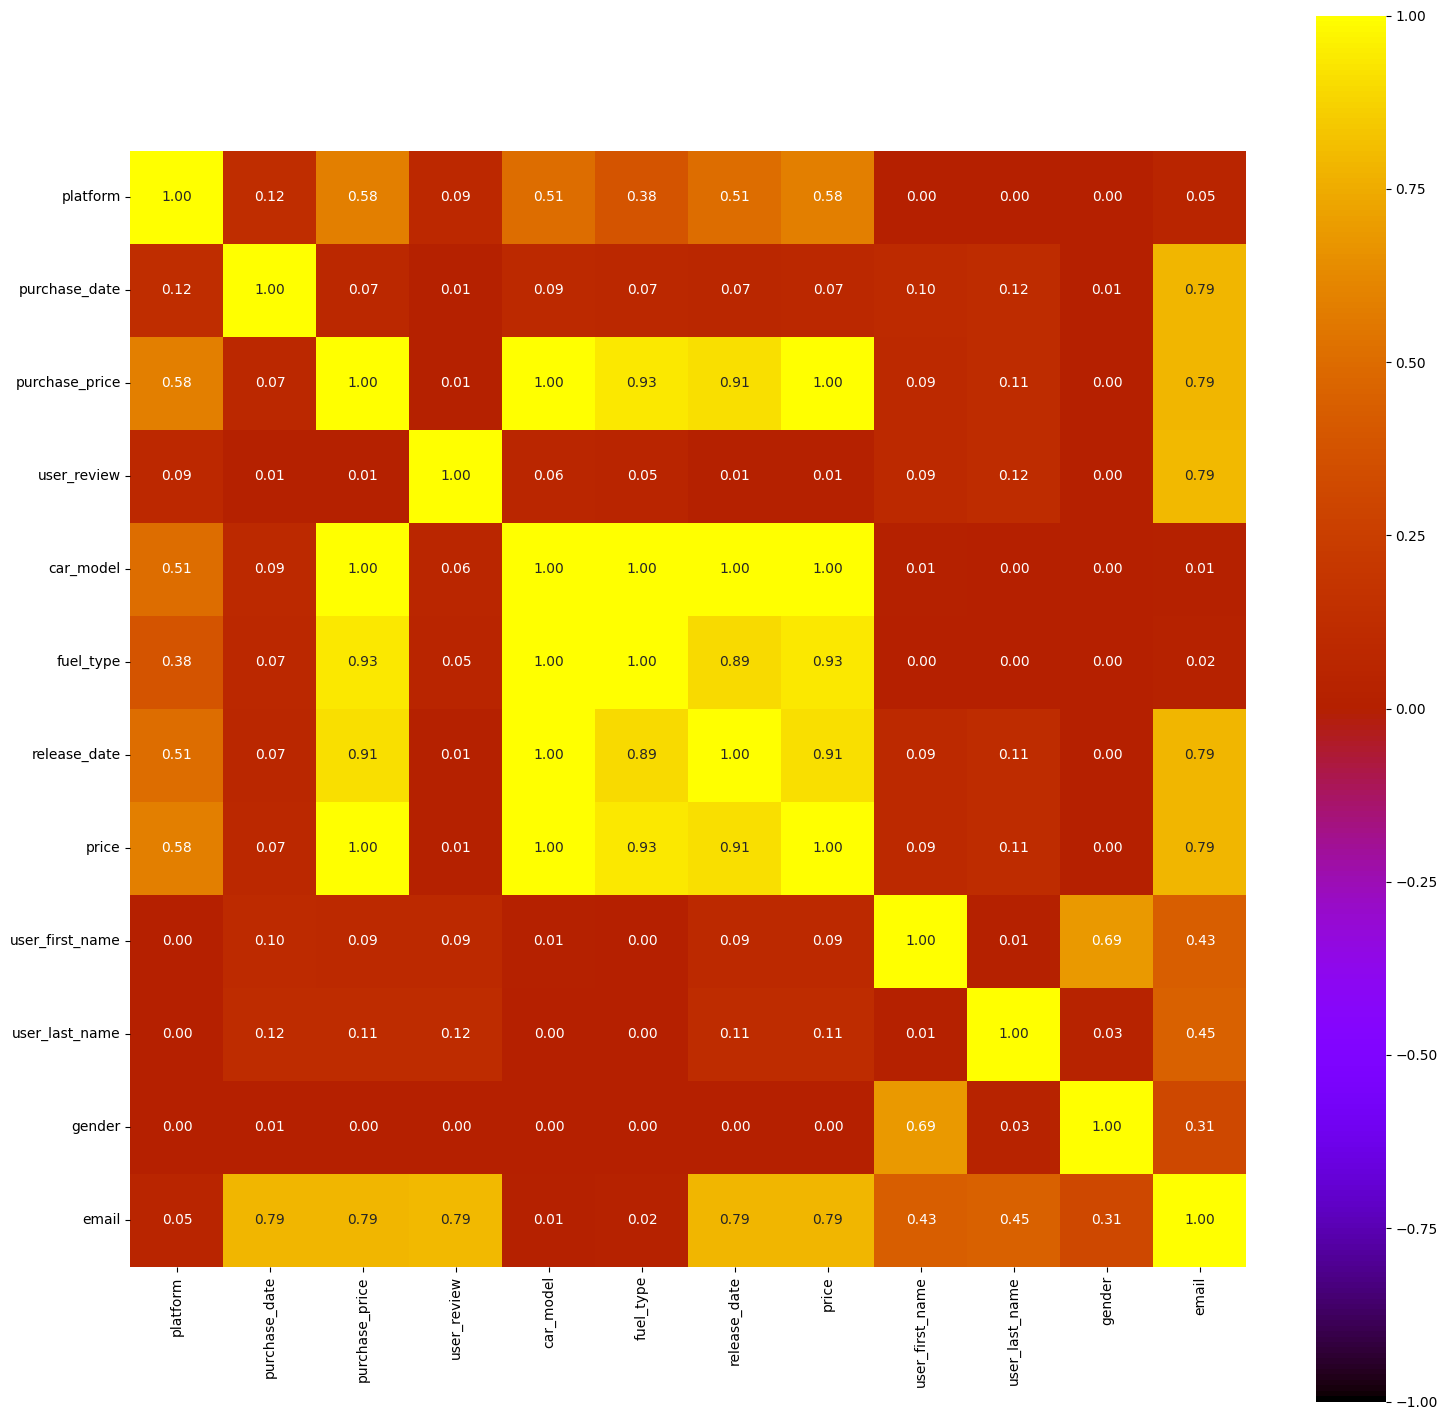

In [99]:
# Generate the correlation matrix
associations_sales = associations(sales_dython, multiprocessing=True, cmap='gnuplot',num_num_assoc='spearman')

It is nice to see that the gender dosen't affect the dataset

### 2.2) Scatter matrix

In [100]:
# plot the scatter plot matrix
px.scatter_matrix(sales.select_dtypes(include=[np.number])).show()

## 3) Analyse all columns one by one

In [101]:
sales.dtypes

transaction_id             object
customer_id                object
car_id                     object
platform                   object
purchase_date      datetime64[ns]
purchase_price            float64
user_review               float64
car_model                  object
fuel_type                  object
release_date       datetime64[ns]
price                       int64
user_first_name            object
user_last_name             object
gender                     object
email                      object
dtype: object

### Platform column

<Axes: xlabel='platform'>

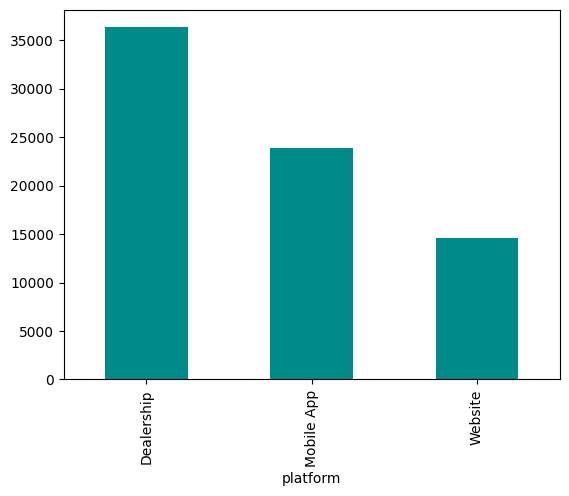

In [102]:
# plot the platform distribution
sales['platform'].value_counts().plot(kind='bar', color='darkcyan')

#### Platform correlation with other columns

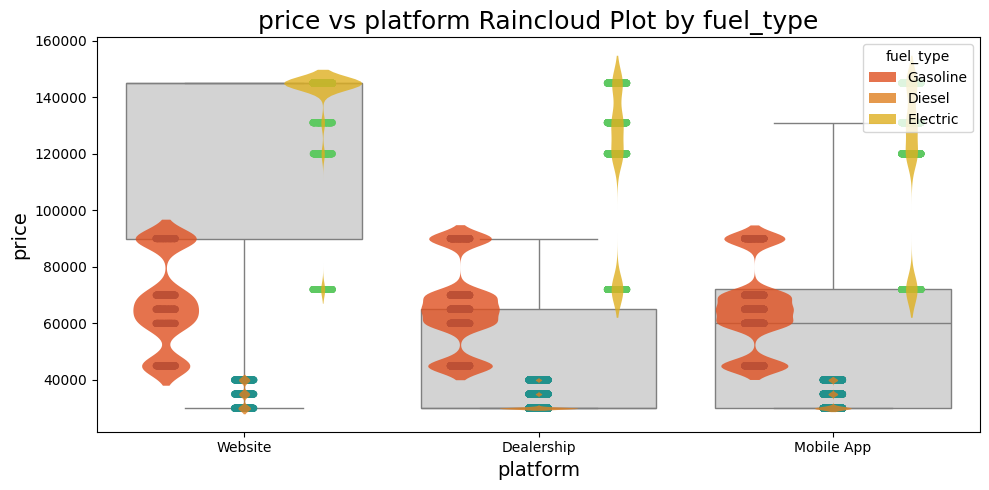

In [103]:
grafici.raincloud_plot(sales, 'price', 'platform', 'fuel_type', figsize=(10,5))

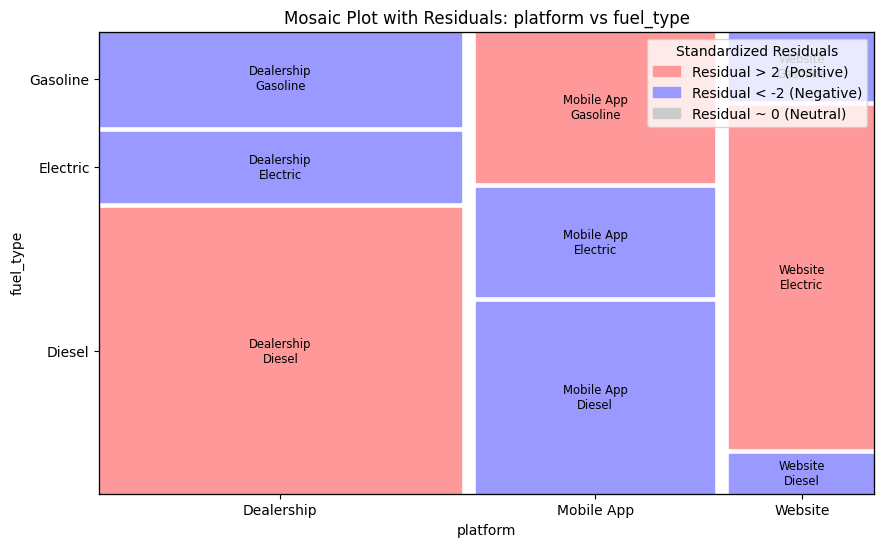

Chi-square Test Residuals:
fuel_type      Diesel    Electric   Gasoline
platform                                    
Dealership  48.400082  -49.874206 -11.405478
Mobile App  -8.040902  -17.289522  30.583881
Website    -66.129487  100.925835 -21.189960


In [104]:
grafici.create_mosaic_plot_with_legend(sales, ['platform', 'fuel_type'])

We can see that the Dealership sells more Diesel, the App sells more Gasoline and the Website sells more Electric cars

#### Price distribution by platform

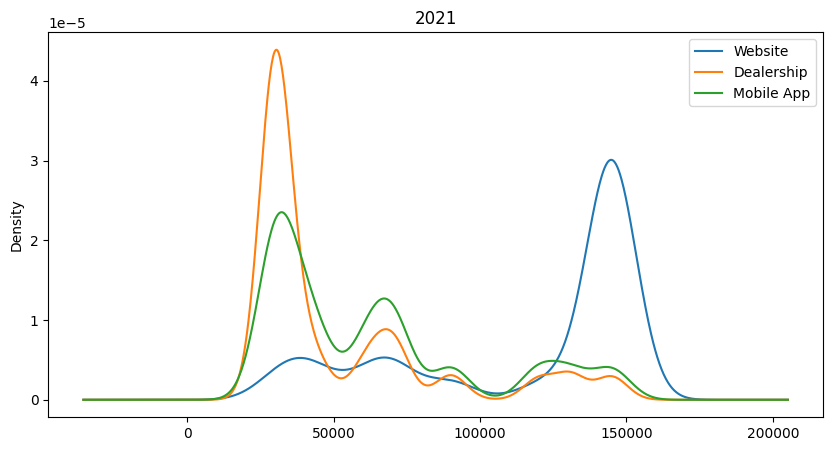

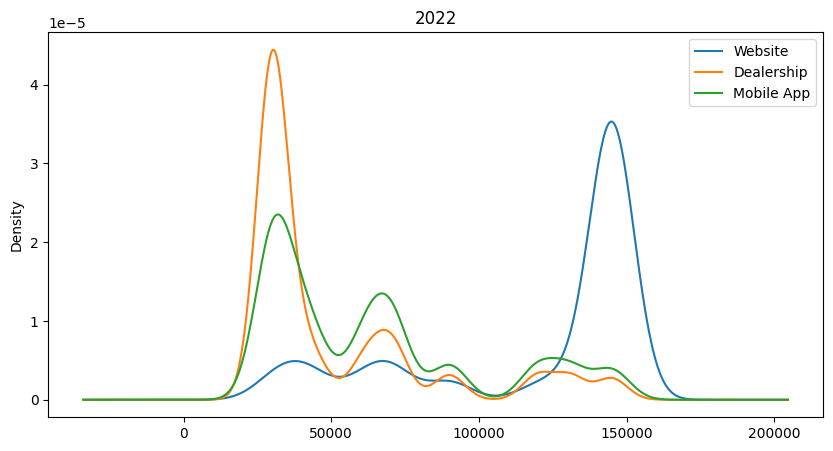

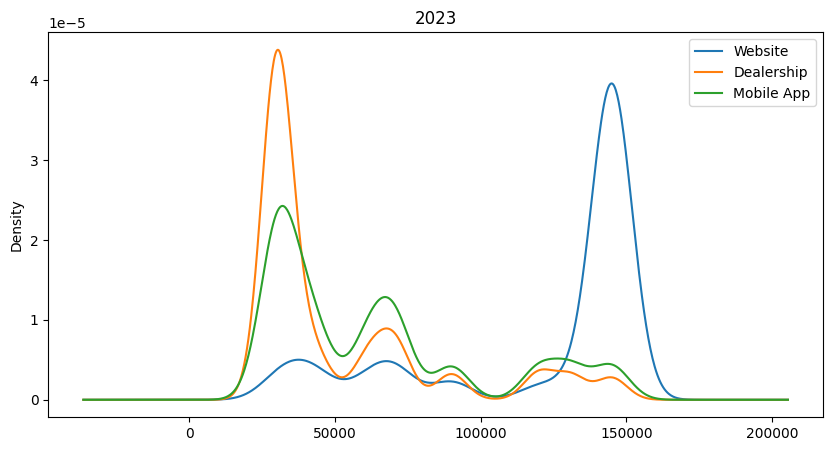

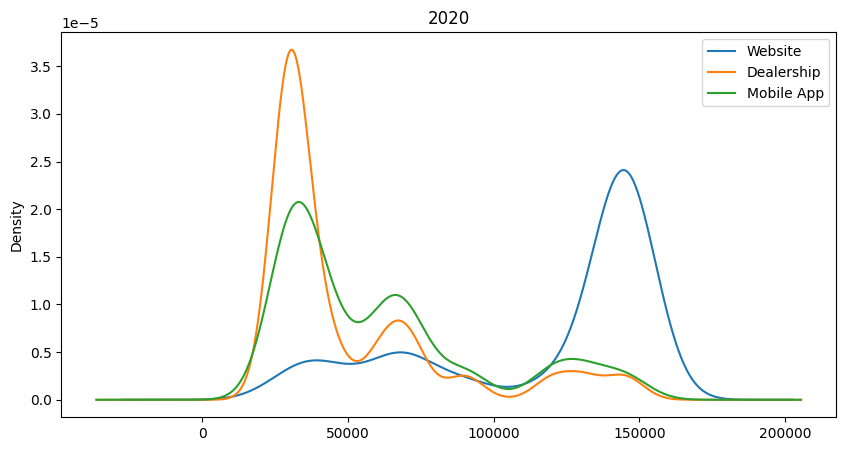

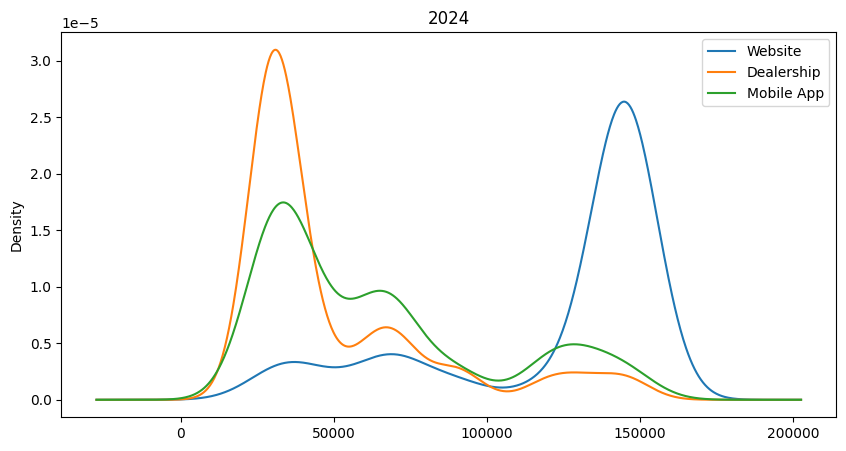

In [110]:
# plot the price distribution colored by the platform for every year
for year in sales['purchase_date'].dt.year.unique():
    plt.figure(figsize=(10,5))
    for platform in sales['platform'].unique():
        sales[(sales['platform'] == platform) & (sales['purchase_date'].dt.year == year)]['purchase_price'].plot(kind='kde', label=platform)
    plt.legend()
    plt.title(year)
    plt.show()

We can see that the most valuable cars are sold on the website, 
<br>the cheapest cars are bought at the dealership or via the mobile app, 
<br>but in the middle range the mobile app sells best. (recently the avarage customer on the app started to buy cheaper kind of cars)

#### User reviews by platform

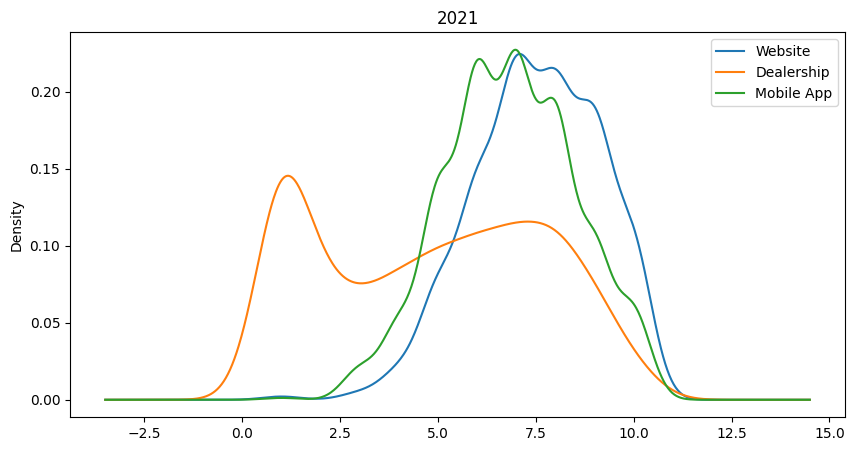

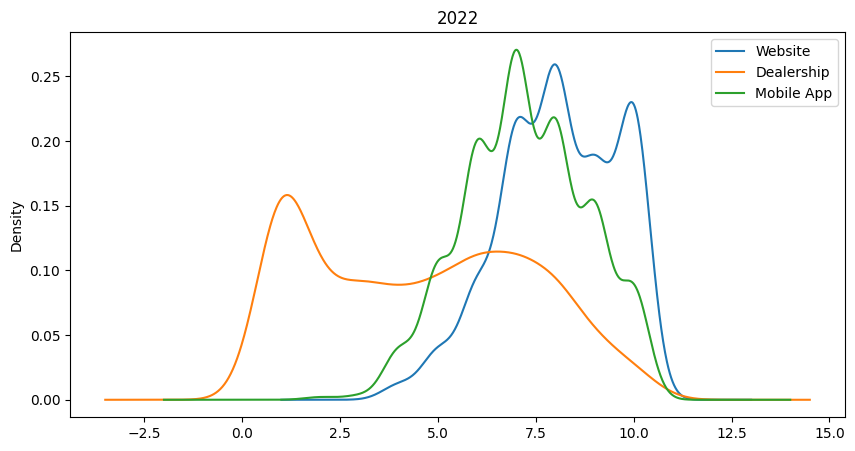

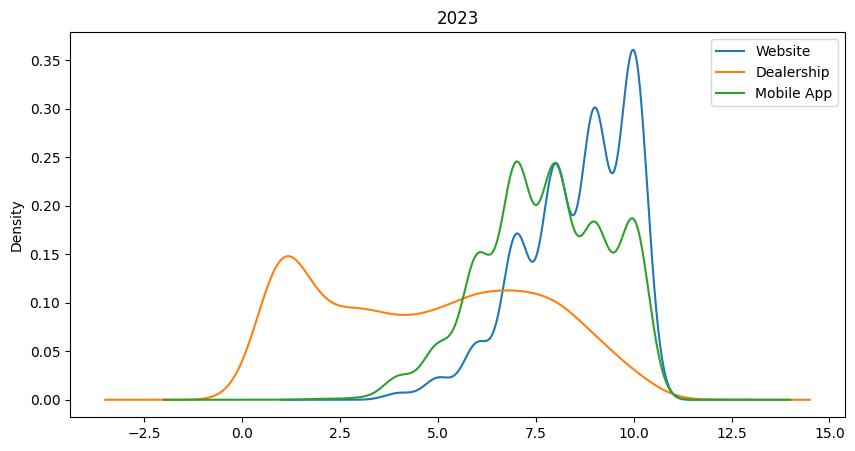

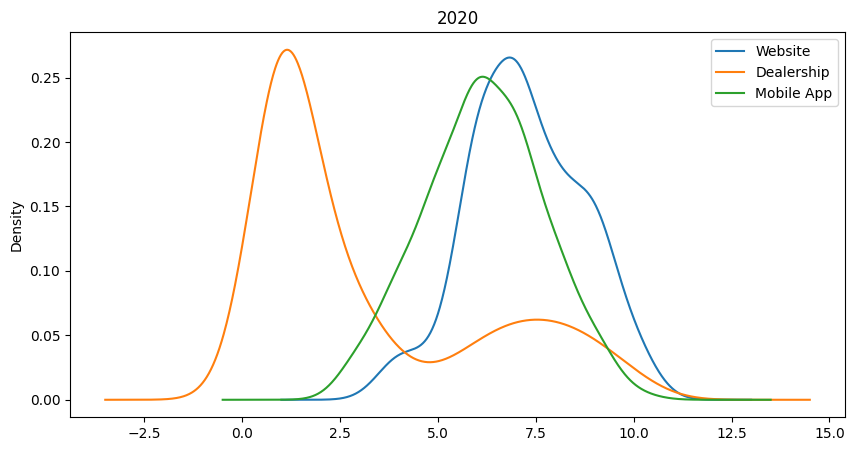

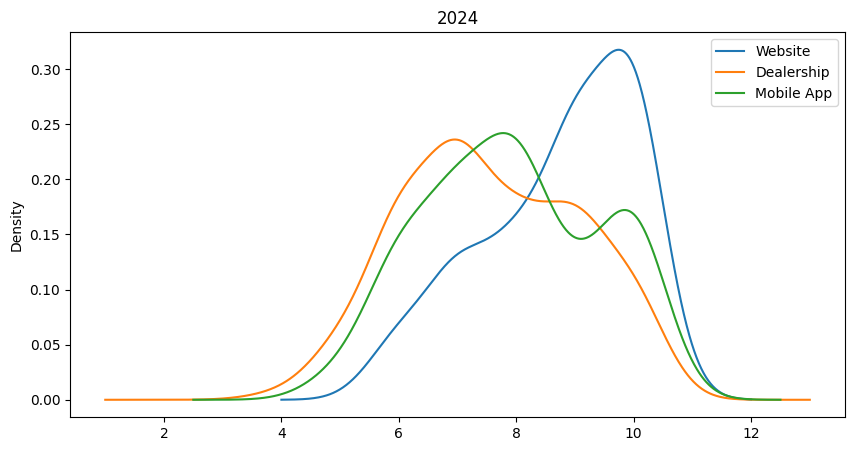

In [122]:
# plot the user_review distribution colored by the platform year after year
for year in sales['purchase_date'].dt.year.unique():
    plt.figure(figsize=(10,5))
    for platform in sales['platform'].unique():
        sales[(sales['platform'] == platform) & (sales['purchase_date'].dt.year == year)]['user_review'].plot(kind='kde', label=platform)
    plt.legend()
    plt.title(year)
    plt.show()

Here we can clearly see that the customers that use the website leave the best reviews
<br>All reviews rated below "2" are conducted exclusively at the dealership. For the 2024 model, we only have data from January, so it's **too early** to determine if the issue has been resolved. This pattern occurs because, for various reasons, the average review score tends to decline throughout the year. Scores start high in January and gradually decrease as the months progress toward December, only for the cycle to reset every January.

<Axes: xlabel='purchase_date'>

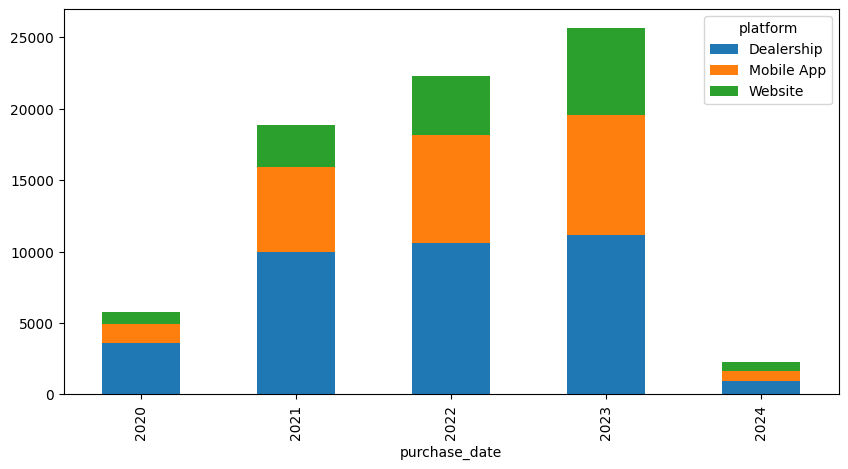

In [107]:
# to be sure let's count the number of sells for each platform for every year
sales.groupby([sales['purchase_date'].dt.year, 'platform']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

As previously demonstrated the website and the app gained a lot of popularity, without compromising the sales of the dealership (they raised too)

### Purchase date column 

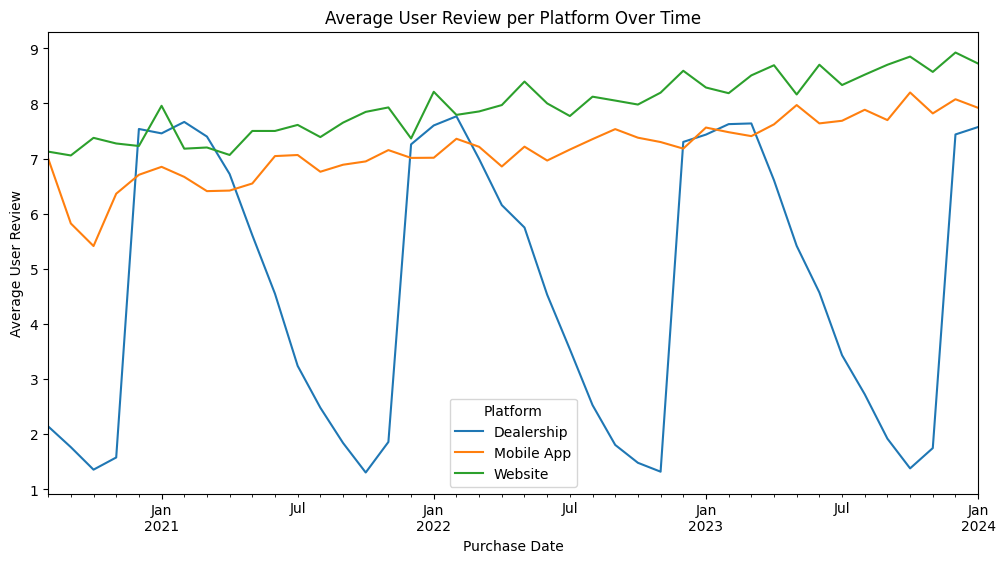

In [ ]:
# Group by platform and purchase date, then calculate the mean user review
avg_reviews = sales.groupby(['platform', sales['purchase_date'].dt.to_period('M')])['user_review'].mean().unstack(level=0)

# Plot the average user review per platform over time
avg_reviews.plot(figsize=(12, 6))
plt.xlabel('Purchase Date')
plt.ylabel('Average User Review')
plt.title('Average User Review per Platform Over Time')
plt.legend(title='Platform')
plt.show()

### Purchase price column

### User review column

### Car model column

### Fuel type column

### Release date column

### Price column

### Gender column

### Price column

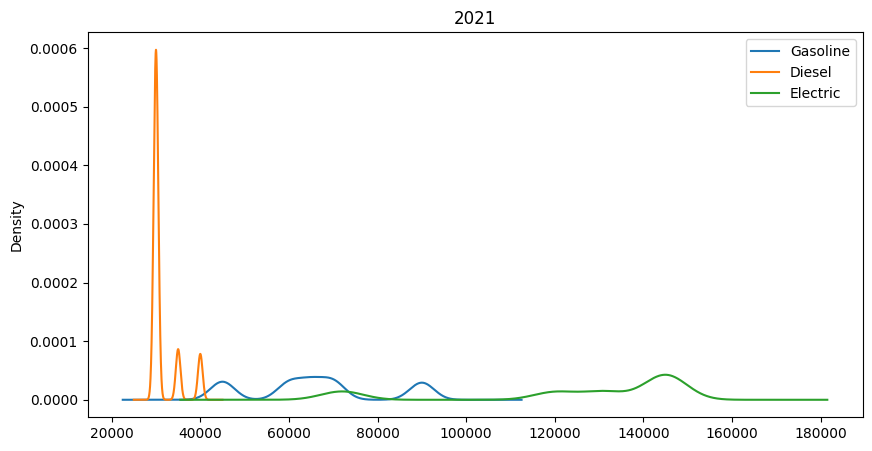

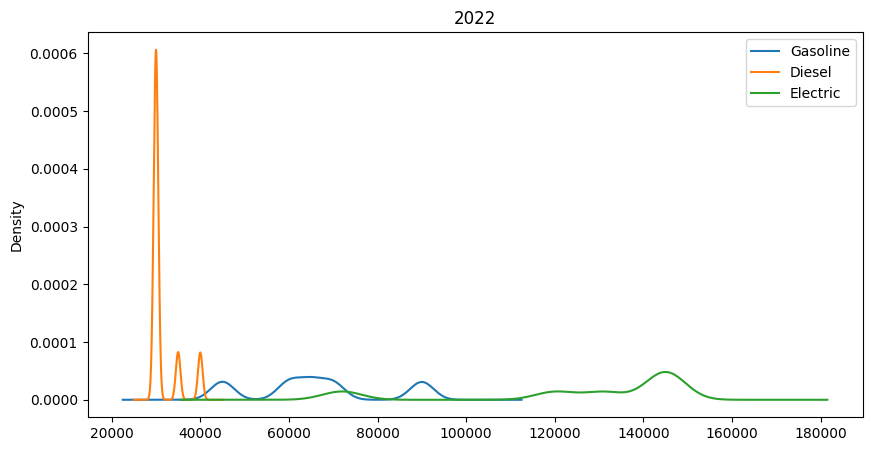

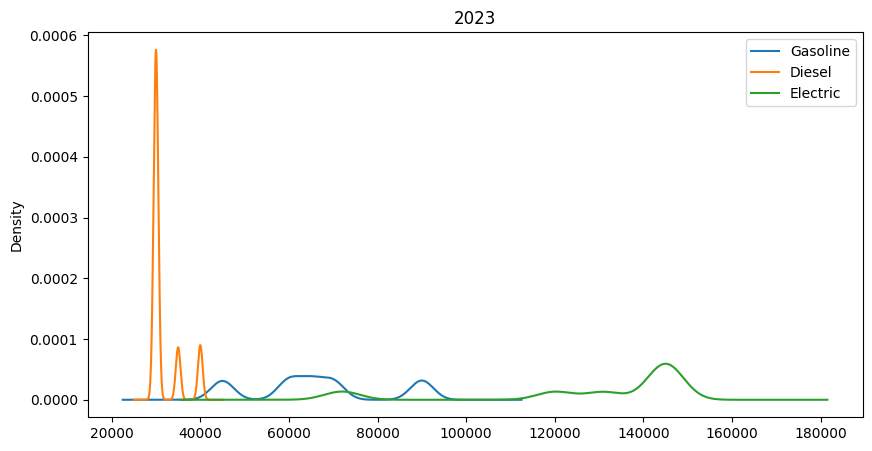

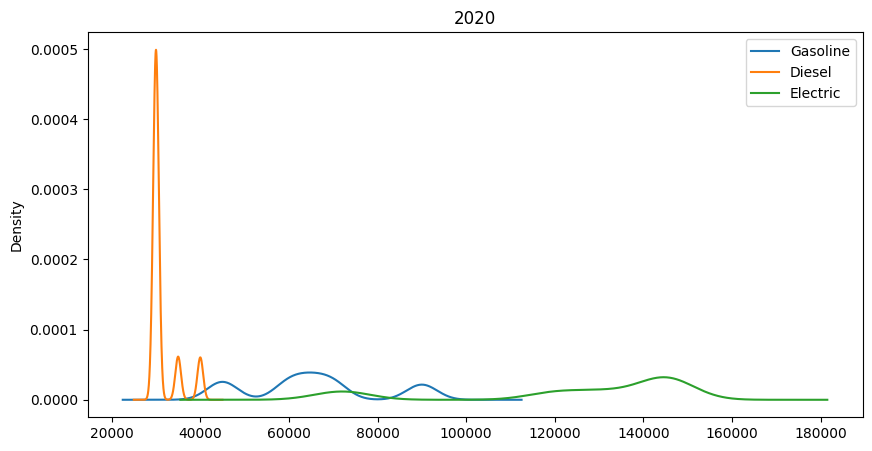

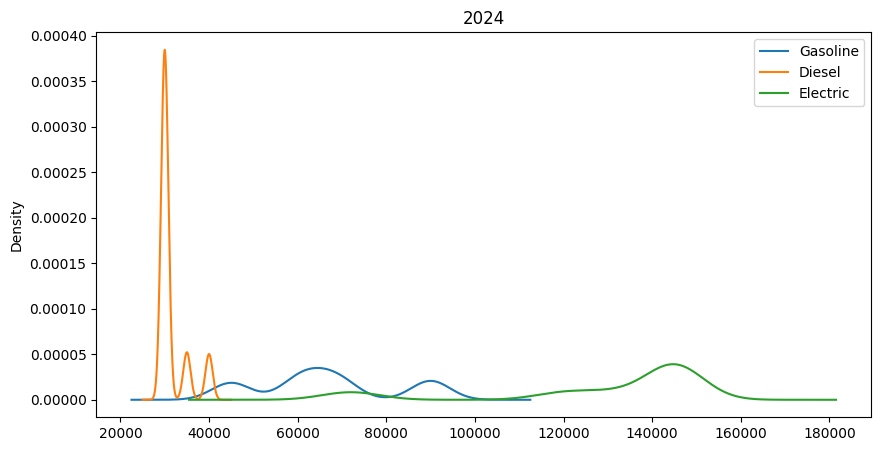

In [109]:
# plot the price distribution colored by the fuel type for every year
for year in sales['purchase_date'].dt.year.unique():
    plt.figure(figsize=(10,5))
    for fuel_type in sales['fuel_type'].unique():
        sales[(sales['fuel_type'] == fuel_type) & (sales['purchase_date'].dt.year == year)]['price'].plot(kind='kde', label=fuel_type)
    plt.legend()
    plt.title(year)
    plt.show()